<a href="https://colab.research.google.com/github/hermannvargens/Introducao_IA_Enq_Quimica/blob/main/Apresentacao_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install optuna


# 0 . Importação das Bibliotecas e dos Dados



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_recall_curve, average_precision_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, roc_auc_score, precision_recall_curve,
    classification_report, accuracy_score, precision_score, recall_score, f1_score,
    make_scorer
)
from sklearn.model_selection import StratifiedKFold, cross_val_score
#import optuna
#from optuna.samplers import TPESampler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.utils.class_weight import compute_class_weight


In [19]:
df = pd.read_csv('/content/drive/Othercomputers/Meu computador/Doutorado/Introdução a IA/Churn/churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# 1 . Contexto
*   **customerID**: Identificador único do cliente.
*   **gender**: Gênero do cliente (Masculino/Feminino).
*   **SeniorCitizen**: Indica se o cliente é idoso (1) ou não (0).
*   **Partner**: Indica se o cliente tem um parceiro (Sim/Não).
*   **Dependents**: Indica se o cliente tem dependentes (Sim/Não).
*   **tenure**: Número de meses que o cliente permaneceu com a empresa.
*   **PhoneService**: Indica se o cliente tem serviço de telefone (Sim/Não).
*   **MultipleLines**: Indica se o cliente tem várias linhas telefônicas (Sim/Não/Sem serviço de telefone).
*   **InternetService**: Tipo de serviço de internet do cliente (DSL/Fiber optic/No).
*   **OnlineSecurity**: Indica se o cliente tem serviço de segurança online (Sim/Não/Sem serviço de internet).
*   **OnlineBackup**: Indica se o cliente tem serviço de backup online (Sim/Não/Sem serviço de internet).
*   **DeviceProtection**: Indica se o cliente tem proteção de dispositivo (Sim/Não/Sem serviço de internet).
*   **TechSupport**: Indica se o cliente tem suporte técnico (Sim/Não/Sem serviço de internet).
*   **StreamingTV**: Indica se o cliente tem streaming de TV (Sim/Não/Sem serviço de internet).
*   **StreamingMovies**: Indica se o cliente tem streaming de filmes (Sim/Não/Sem serviço de internet).
*   **Contract**: Tipo de contrato do cliente (Month-to-month/One year/Two year).
*   **PaperlessBilling**: Indica se o cliente tem faturamento sem papel (Sim/Não).
*   **PaymentMethod**: Método de pagamento do cliente (Electronic check/Mailed check/Bank transfer (automatic)/Credit card (automatic)).
*   **MonthlyCharges**: Valor cobrado do cliente mensalmente.
*   **TotalCharges**: Valor total cobrado do cliente.
*   **Churn**: Indica se o cliente cancelou o serviço (Sim/Não).

# 2 . Análise Exploratória

In [ ]:
#Obter informações de valores ausentes e tipos de coluna

df.info()

df.isnull().sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


np.int64(0)

## 2.1 . Distribuição de Churn

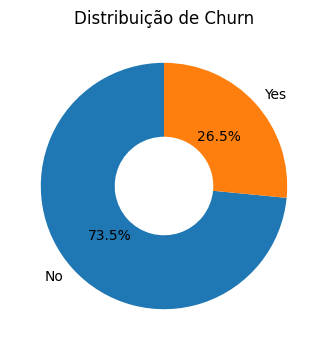

Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [ ]:
churn_counts = df['Churn'].value_counts()

plt.figure(figsize=(4,4))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.6))
plt.title('Distribuição de Churn')
plt.show()

print(df['Churn'].value_counts())

## 2.2 . Taxa de Churn por Categoria

Quais categorias tem maior propensão ao Churn?

In [11]:
# Identifica variáveis categóricas
cat_cols = df.drop(columns=['customerID','TotalCharges']).select_dtypes(include=['object']).columns.tolist()

# Convert 'Churn' column to numeric (1 for 'Yes', 0 for 'No')
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

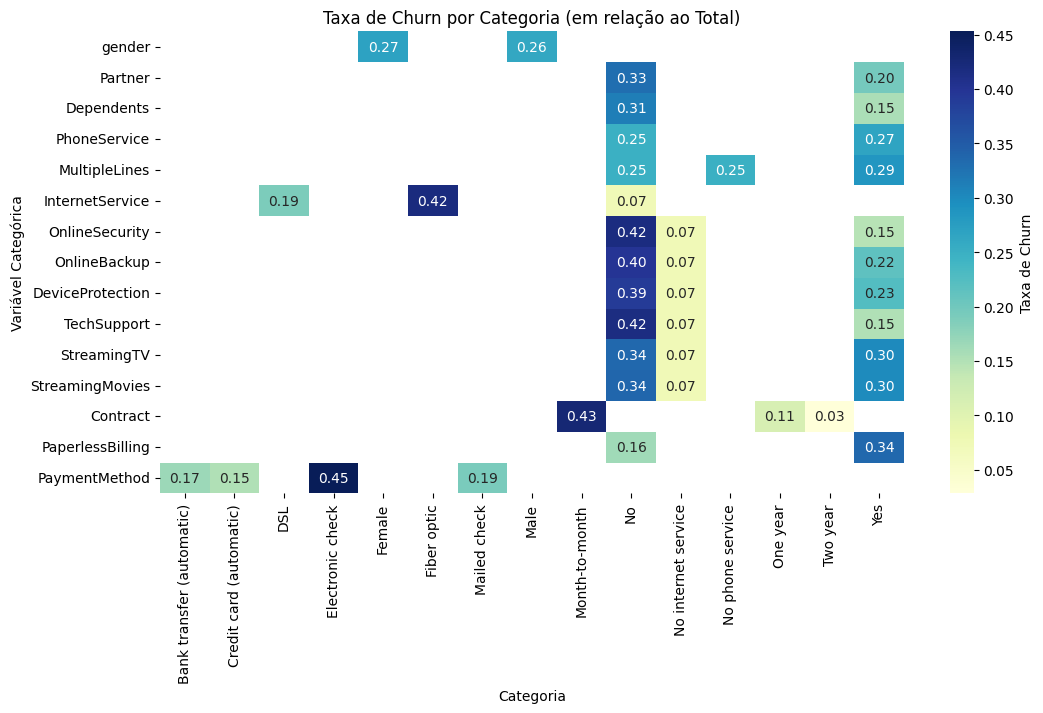

In [21]:
churn_summary = {}

for col in cat_cols:
    churn_summary[col] = df.groupby(col)['Churn'].mean()

churn_df = pd.DataFrame(churn_summary).T

plt.figure(figsize=(12,6))
sns.heatmap(churn_df, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Taxa de Churn'})
plt.title("Taxa de Churn por Categoria (em relação ao Total)")
plt.ylabel("Variável Categórica")
plt.xlabel("Categoria")
plt.show()

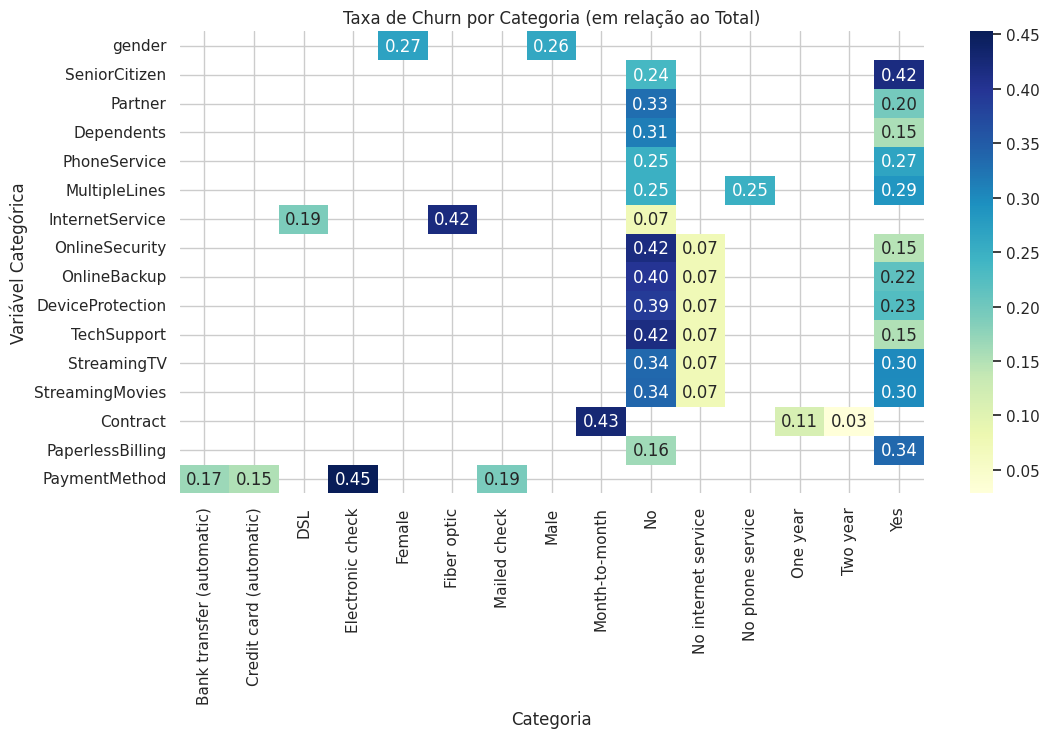

In [ ]:
churn_summary = {}

for col in cat_cols:
    churn_summary[col] = df.groupby(col)['Churn'].mean()

churn_df = pd.DataFrame(churn_summary).T

plt.figure(figsize=(12,6))
sns.heatmap(churn_df, annot=True, cmap="YlGnBu", fmt=".2f")#, cbar_kws={'label': 'Taxa de Churn'})
plt.title("Taxa de Churn por Categoria (em relação ao Total)")
plt.ylabel("Variável Categórica")
plt.xlabel("Categoria")
plt.show()


## 2.3 . Distribuição das Categorias entre os Churns

Quais categorias são mais comuns entre os Churns?

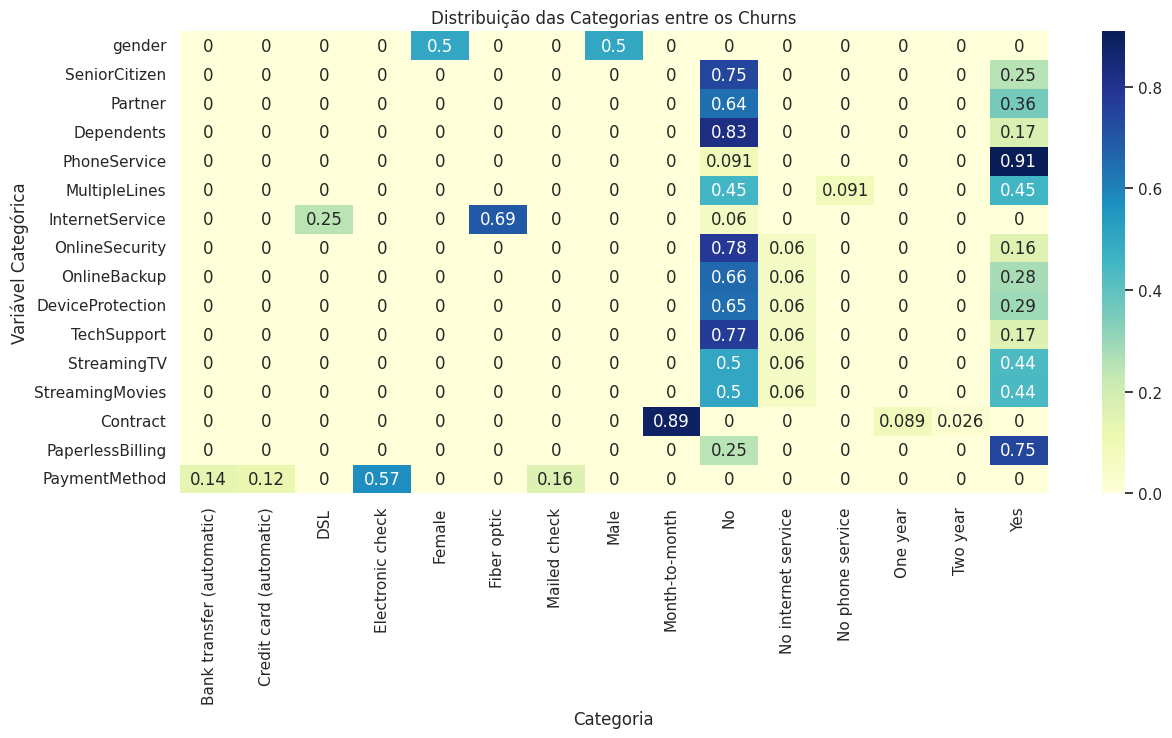

In [ ]:
churn_summary = {}

# Filtra apenas churn == 1
df_churn = df[df['Churn'] == 1]

for col in cat_cols:
    churn_summary[col] = df_churn[col].value_counts()/df_churn[col].shape[0]

churn_df = pd.DataFrame(churn_summary).fillna(0).T  # Preenche NaNs com 0

plt.figure(figsize=(14,6))
sns.heatmap(churn_df, annot=True, cmap="YlGnBu")#,  cbar_kws={'label': 'Taxa de Churns'})
plt.title("Distribuição das Categorias entre os Churns")
plt.ylabel("Variável Categórica")
plt.xlabel("Categoria")
plt.show()


# 3 . Pré-processamento dos dados

## 3.1 . Converter colunas para o formato correto

In [ ]:
# Converter a coluna TotalCharges para numérica

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# Remover a coluna customerID

df.drop('customerID', axis=1, inplace=True)

## 3.2 . Split dos dados

In [ ]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
y = df['Churn']
X = df.drop('Churn', axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


## 3.2 . Pipeline (Encoding + Scaling)

In [ ]:
# 1. Identifica variáveis categóricas e numéricas
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# 2. Cria transformações
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_cols),
        ('num', StandardScaler(), num_cols)
    ]
)

# 3. Aplica transformação
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# 5. Cria DataFrame final com nomes de colunas
feature_names = preprocessor.get_feature_names_out()
X_train = pd.DataFrame(X_train_transformed, columns=feature_names)
X_test = pd.DataFrame(X_test_transformed, columns=feature_names)


# 6. Junta com y
df_final = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)

df_final

,cat__gender_Male,cat__Partner_Yes,cat__Dependents_Yes,cat__PhoneService_Yes,cat__MultipleLines_No phone service,cat__MultipleLines_Yes,cat__InternetService_Fiber optic,cat__InternetService_No,cat__OnlineSecurity_No internet service,cat__OnlineSecurity_Yes,...,cat__Contract_Two year,cat__PaperlessBilling_Yes,cat__PaymentMethod_Credit card (automatic),cat__PaymentMethod_Electronic check,cat__PaymentMethod_Mailed check,num__SeniorCitizen,num__tenure,num__MonthlyCharges,num__TotalCharges,Churn
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,-0.441773,0.102371,-0.521976,-0.263289,0
1,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,-0.441773,-0.711743,0.337478,-0.504814,0
2,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,-0.441773,-0.793155,-0.809013,-0.751213,0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,-0.441773,-0.263980,0.284384,-0.173699,0
4,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,-0.441773,-1.281624,-0.676279,-0.990851,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,-0.441773,1.567778,1.470695,2.373711,0
5630,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.441773,-1.240918,-0.626504,-0.975133,1
5631,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,2.263606,-0.304686,1.256662,0.157569,1
5632,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,-0.441773,-0.345392,-1.477661,-0.798434,0


# 4 . Modelagem

Nesta etapa, realizaremos a modelagem (ajuste) dos dados com dois modelos diferentes: Gaussian Naive-Bayes e SVC.   

Utilizaremos também otimização bayesiana para ajuste dos hiperparâmetros do modelo SVC, com base na métrica F1-score. Nesse trabalho, temos:  

| Previsão / Realidade                     | Consequência no negócio                           |
|------------------------------------------|---------------------------------------------------|
| Verdadeiro Positivo (TP) – prever churn corretamente | Permite agir e talvez reter o cliente           |
| Falso Negativo (FN) – prever que fica, mas ele churnou | Perde o cliente sem ter tentado retê-lo         |
| Falso Positivo (FP) – prever churn, mas ele não churnou | Oferece desconto ou incentivo desnecessário (custo)  |
| Verdadeiro Negativo (TN) – prever que fica e ele fica | Nenhuma ação necessária                         |

  

Hipótese: Perder um cliente (FN) costuma ser mais caro do que oferecer um desconto à toa (FP).
Portanto, FN é o erro mais crítico.  

Assim, a métrica mais importante é o Recall, que mede a fração de churners que conseguimos detectar. Como um grande aumento no Recall irá diminuir o Precision, optamos por utilizar a média harmônica entre os dois, o F1-Score:  
$$
F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$



## 4.1 . Ajuste e Avaliação do modelos Gaussian Naive-Bayes

In [ ]:
# Instanciando o modelo Naive-Bayes

nb_model = GaussianNB()

# AVALIAÇÃO USANDO CROSS-VALIDATION
# Usamos o conjunto de TREINO para a validação cruzada.
# Definimos a métrica F1-score usando make_scorer, que é o ideal para o cross_val_score.
f1_scorer = make_scorer(f1_score)
cv_scores_nb = cross_val_score(
    estimator=nb_model,
    X=X_train,
    y=y_train,
    cv=5, # Usando 5-Fold Cross-Validation (valor padrão e comum)
    scoring=f1_scorer,
    n_jobs=-1 # Usar todos os núcleos da CPU para paralelizar o cálculo
)

# Análise da Avaliação com Cross-Validation

print(f"F1-Scores por Fold: {cv_scores_nb}")
print(f"Média do F1-Score (Estimativa de Generalização): {cv_scores_nb.mean():.4f}")
print(f"Desvio Padrão do F1-Score: {cv_scores_nb.std():.4f}")

nb_model.fit(X_train, y_train)

# Predição dos dados com o modelo
y_proba_nb = nb_model.predict_proba(X_test)[:,1]
#y_nb = nb_model.predict(X_test)

f1_score_nb = f1_score(y_test, y_proba_nb > 0.5)

# Avaliação preliminar do modelo
print(f'O valor de F1-score no conjunto de teste é: {f1_score_nb}')
#print(f1_score(y_test, y_nb))

F1-Scores por Fold: [0.59754738 0.5778781  0.59840728 0.56068743 0.5620915 ]
Média do F1-Score (Estimativa de Generalização): 0.5793
Desvio Padrão do F1-Score: 0.0164
O valor de F1-score no conjunto de teste é: 0.5719329214474845


## 4.2 . Ajuste e Avaliação do modelos SVC

In [ ]:
# Ajuste do modelo SVC

svc_model = SVC(probability=True, C=1.0, kernel='rbf', degree=3, gamma=1, class_weight='balanced', random_state=42)

f1_scorer = make_scorer(f1_score)
cv_scores = cross_val_score(
    estimator=svc_model,
    X=X_train,
    y=y_train,
    cv=5, # 5-Fold Cross-Validation
    scoring=f1_scorer,
    n_jobs=-1 # Paraleliza o cálculo usando todos os núcleos da CPU
)

# Análise da Avaliação com Cross-Validation

print(f"F1-Scores por Fold (cv=5): {cv_scores.round(4)}") # Arredonda para 4 casas decimais
print(f"Média do F1-Score (Estimativa de Generalização): {cv_scores.mean():.4f}")
print(f"Desvio Padrão do F1-Score: {cv_scores.std():.4f}")

svc_model.fit(X_train, y_train)

# Predição dos dados com o modelo
y_proba_svc = svc_model.predict_proba(X_test)[:,1]

# Avaliação preliminar do modelo

print(f'O valor de F1-score no conjunto de teste é : {f1_score(y_test, y_proba_svc > 0.5)}')

F1-Scores por Fold (cv=5): [0.5918 0.5604 0.5623 0.5387 0.5442]
Média do F1-Score (Estimativa de Generalização): 0.5595
Desvio Padrão do F1-Score: 0.0185
O valor de F1-score no conjunto de teste é : 0.5119236883942766


## 4.3 . Ajuste de Hiperparâmetros usando Otimização Bayesiana

In [ ]:
# Função objetivo para otimização

def objective(trial):
    # Espaço de busca
    kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly'])
    C = trial.suggest_float('C', 0.1, 10.0, log=True)
    gamma = trial.suggest_float('gamma', 1e-3, 0.1, log=True)

    # Parâmetro condicional: degree só se kernel == 'poly'
    if kernel == 'poly':
        degree = trial.suggest_int('degree', 2, 5)
    else:
        degree = 3  # valor padrão do SVC, não afeta se kernel ≠ 'poly'

    # Criação do modelo
    model = SVC(
        kernel=kernel,
        C=C,
        gamma=gamma,
        degree=degree,
        class_weight='balanced',
        probability=True,
        random_state=42
    )

    # Validação cruzada com F1-score
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(
    model, X_train, y_train, cv=cv,
    scoring=make_scorer(f1_score, average='binary'),
    n_jobs=-1
    )


    return scores.mean()

# Criação do estudo e otimização

study = optuna.create_study(
    direction='maximize',
    study_name='SVC_Optuna',
    sampler=TPESampler(n_startup_trials=10)
)
study.optimize(objective, n_trials=30, timeout=None)

# Resultados

print("\nMelhores Hiperparâmetros:")
print(study.best_params)

print("\nMelhor F1-score na validação cruzada: {:.4f}".format(study.best_value))

[I 2025-10-01 01:27:43,120] A new study created in memory with name: SVC_Optuna
[I 2025-10-01 01:28:12,891] Trial 0 finished with value: 0.6180914944068456 and parameters: {'kernel': 'rbf', 'C': 0.724837419147268, 'gamma': 0.020764889231913167}. Best is trial 0 with value: 0.6180914944068456.
[I 2025-10-01 01:28:39,744] Trial 1 finished with value: 0.6147413432026624 and parameters: {'kernel': 'rbf', 'C': 4.73610858981544, 'gamma': 0.020055784465596194}. Best is trial 0 with value: 0.6180914944068456.
[I 2025-10-01 01:29:06,659] Trial 2 finished with value: 0.6163917740032836 and parameters: {'kernel': 'rbf', 'C': 1.8065539395608177, 'gamma': 0.031805678873072146}. Best is trial 0 with value: 0.6180914944068456.
[I 2025-10-01 01:29:33,074] Trial 3 finished with value: 0.5982805554513997 and parameters: {'kernel': 'linear', 'C': 1.4107629029868365, 'gamma': 0.0011176841534882248}. Best is trial 0 with value: 0.6180914944068456.
[I 2025-10-01 01:30:01,142] Trial 4 finished with value: 0.


Melhores Hiperparâmetros:
{'kernel': 'rbf', 'C': 0.5205471802326085, 'gamma': 0.011367654018933176}

Melhor F1-score na validação cruzada: 0.6236


In [ ]:
#best_params = study.best_params
best_params = {'kernel': 'rbf', 'C': 0.5205471802326085, 'gamma': 0.011367654018933176}

svc_model = SVC(
    kernel=best_params['kernel'],
    C=best_params['C'],
    gamma=best_params['gamma'],
    degree=best_params.get('degree', 3),
    class_weight='balanced',
    probability=True,
    random_state=42
)

# Avaliação do modelo com Cross-Validation

f1_scorer = make_scorer(f1_score, average='binary') # Define o F1-score como métrica
cv_scores_svc = cross_val_score(
    estimator=svc_model,
    X=X_train,
    y=y_train,
    cv=5,      # 5-Fold Cross-Validation
    scoring=f1_scorer,
    n_jobs=-1
)

# Análise da Validação Cruzada
print(f"Média do F1-Score (Estimativa de Generalização): {cv_scores_svc.mean():.4f}")
print(f"Desvio Padrão dos Scores: {cv_scores_svc.std():.4f}")
print("----------------------------------------------------------")

svc_model.fit(X_train, y_train)

y_proba_svc = svc_model.predict_proba(X_test)[:,1]

f1_svc = f1_score(y_test, y_proba_svc>0.5, average='binary')
print(f"F1-score (binary) no conjunto de teste: {f1_svc:.4f}")

Média do F1-Score (Estimativa de Generalização): 0.6225
Desvio Padrão dos Scores: 0.0170
----------------------------------------------------------
F1-score (binary) no conjunto de teste: 0.5974


# 5 . Avaliação dos Modelos

## 5.1 . F1-Score

Como explicamos anteriormente, vamos utilizar o F1-score como critério para escolha do melhor modelo.

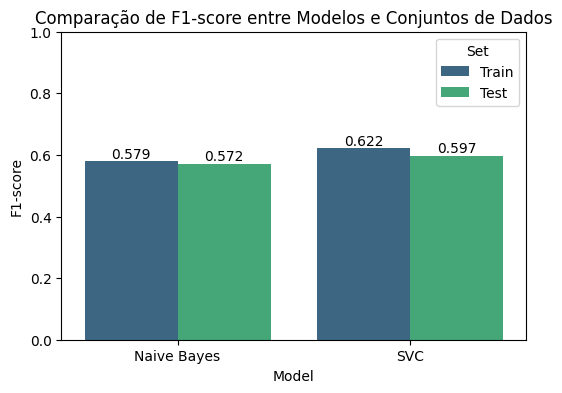

In [ ]:
#Gaussian Naive-Bayes
f1_nb_train = cv_scores_nb.mean()
f1_nb_test = f1_score_nb

# SVC
f1_svc_train = cv_scores_svc.mean()
f1_svc_test = f1_svc

# Criando um dataframe para armazenar os dados
data = {'Model': ['Naive Bayes', 'Naive Bayes', 'SVC', 'SVC'],
        'Set': ['Train', 'Test', 'Train', 'Test'],
        'F1-score': [f1_nb_train, f1_nb_test, f1_svc_train, f1_svc_test]}
df_scores = pd.DataFrame(data)

# Plotar os gráficos
plt.figure(figsize=(6,4))
ax = sns.barplot(x='Model', y='F1-score', hue='Set', data=df_scores, palette='viridis')
plt.title('Comparação de F1-score entre Modelos e Conjuntos de Dados')
plt.ylabel('F1-score')
plt.ylim(0, 1)

# Anotar os valores nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f')

plt.show()

Em príncipio, podemos verificar que não há sobreajuste do conjunto de teste em relação ao conjunto de treino. Podemos verificar também que o modelo SVC é um pouco superior ao modelo Naive-Bayes.

## 5.2 . Curva ROC

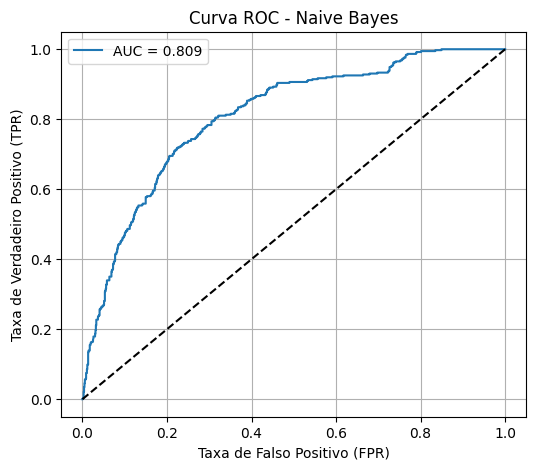

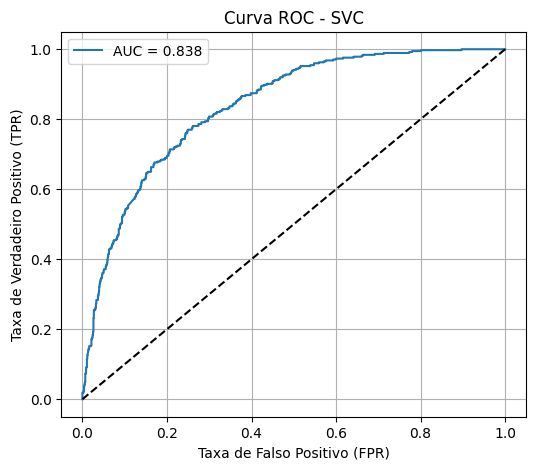

In [ ]:
def plot_roc_curve(y_true, y_proba, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    auc = roc_auc_score(y_true, y_proba)

    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, label=f'AUC = {auc:.3f}')
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('Taxa de Falso Positivo (FPR)')
    plt.ylabel('Taxa de Verdadeiro Positivo (TPR)')
    plt.title(f'Curva ROC - {model_name}')
    plt.legend()
    plt.grid()
    plt.show()

plot_roc_curve(y_test, y_proba_nb, 'Naive Bayes')
plot_roc_curve(y_test, y_proba_svc, 'SVC')


As duas curvas ROC estão longe da diagonal, o que indica que ambos os modelos apresentam um bom desempenho.

## 5.2 . Threshold

Vamos agora avaliar o desempenho do modelo analisando diferentes Threshoulds:

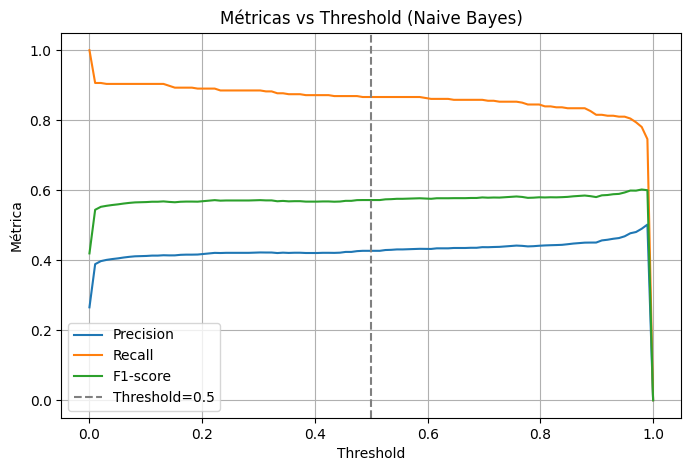

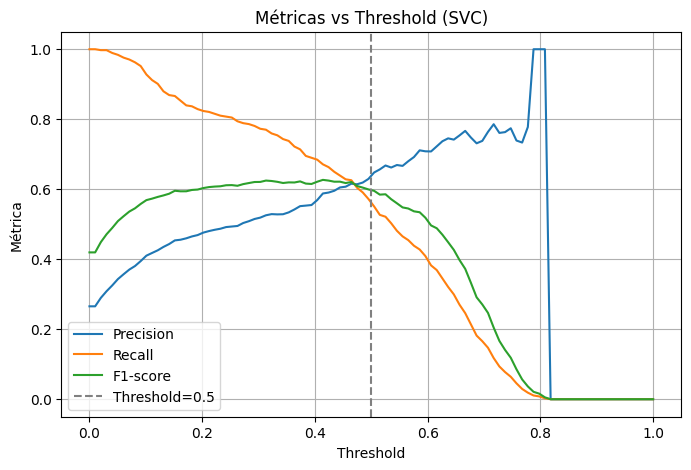

In [ ]:
def plot_metrics_vs_threshold(y_true, y_proba, model_name):
    thresholds = np.linspace(0,1,100)
    precisions, recalls, f1s = [],[],[]

    for t in thresholds:
        y_pred = (y_proba >= t).astype(int)
        precisions.append(precision_score(y_true, y_pred, zero_division=0))
        recalls.append(recall_score(y_true, y_pred))
        f1s.append(f1_score(y_true, y_pred))

    plt.figure(figsize=(8,5))
    plt.plot(thresholds, precisions, label='Precision')
    plt.plot(thresholds, recalls, label='Recall')
    plt.plot(thresholds, f1s, label='F1-score')
    plt.axvline(0.5, color='gray', linestyle='--', label='Threshold=0.5')
    plt.xlabel('Threshold')
    plt.ylabel('Métrica')
    plt.title(f'Métricas vs Threshold ({model_name})')
    plt.legend()
    plt.grid()
    plt.show()

plot_metrics_vs_threshold(y_test, y_proba_nb, 'Naive Bayes')
plot_metrics_vs_threshold(y_test, y_proba_svc, 'SVC')


In [ ]:
def best_threshold_for_f1(y_true, y_proba, thresholds=None):

    if thresholds is None:
        thresholds = np.linspace(0, 1, 101)

    best_thresh = 0.5
    best_f1 = 0.0
    best_recall = 0.0

    for t in thresholds:
        y_pred = (y_proba >= t).astype(int)
        f1 = f1_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)

        if f1 > best_f1:
            best_f1 = f1
            best_thresh = t
            best_recall = recall

    return best_thresh, best_f1, best_recall

best_thresh_SVC, best_f1, best_recall = best_threshold_for_f1(y_test, y_proba_svc)
print("Resultados para SVC")
print(f"Melhor threshold: {best_thresh_SVC:.3f}")
print(f"Melhor F1-score: {best_f1:.3f}")
print(f"Melhor Recall: {best_recall:.3f}")
print('----------------------------------')
print("Resultados para GNB")
best_thresh_NB, best_f1, best_recall = best_threshold_for_f1(y_test, y_proba_nb)
print(f"Melhor threshold: {best_thresh_NB:.3f}")
print(f"Melhor F1-score: {best_f1:.3f}")
print(f"Melhor Recall: {best_recall:.3f}")

Resultados para SVC
Melhor threshold: 0.430
Melhor F1-score: 0.626
Melhor Recall: 0.660
----------------------------------
Resultados para GNB
Melhor threshold: 0.980
Melhor F1-score: 0.601
Melhor Recall: 0.778


Dos gráficos acima, percebemos que para o gráfico do Gaussian Naive Bayes, as curvas das métricas se mantém praticamente constantes até próximos do limite de 0,9 do Threshold.  
Já para o SVC, por volta de 0,4, F1-score começa a diminuir. Assim, para melhorar o desempenho do modelo SVC, podemos ainda encontrar o melhor valor para o Threshold:

## 5.4 . Curva Precion-Recall

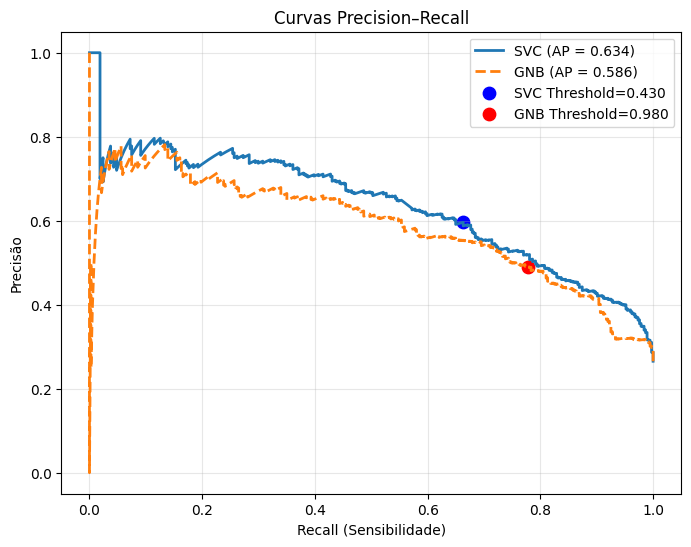

In [ ]:
def plot_precision_recall_curves(y_true, y_proba_svc, y_proba_gnb,
                                 best_thresh_svc, best_thresh_gnb):
    # Métricas para SVC
    precision_svc, recall_svc, thresh_svc = precision_recall_curve(y_true, y_proba_svc)
    ap_svc = average_precision_score(y_true, y_proba_svc)

    # Métricas para GNB
    precision_gnb, recall_gnb, thresh_gnb = precision_recall_curve(y_true, y_proba_gnb)
    ap_gnb = average_precision_score(y_true, y_proba_gnb)

    # --- Ponto do threshold ótimo para SVC
    # Encontrar a posição mais próxima do threshold ótimo
    idx_svc = (np.abs(thresh_svc - best_thresh_svc)).argmin()
    prec_svc_best = precision_svc[idx_svc]
    rec_svc_best = recall_svc[idx_svc]

    # --- Ponto do threshold ótimo para GNB
    idx_gnb = (np.abs(thresh_gnb - best_thresh_gnb)).argmin()
    prec_gnb_best = precision_gnb[idx_gnb]
    rec_gnb_best = recall_gnb[idx_gnb]

    # Plot
    plt.figure(figsize=(8, 6))
    plt.plot(recall_svc, precision_svc, label=f"SVC (AP = {ap_svc:.3f})", lw=2)
    plt.plot(recall_gnb, precision_gnb, label=f"GNB (AP = {ap_gnb:.3f})", lw=2, linestyle='--')

    # Destacar os thresholds ótimos
    plt.scatter(rec_svc_best, prec_svc_best, color='blue', marker='o', s=80,
                label=f"SVC Threshold={best_thresh_svc:.3f}")
    plt.scatter(rec_gnb_best, prec_gnb_best, color='red', marker='o', s=80,
                label=f"GNB Threshold={best_thresh_gnb:.3f}")

    plt.xlabel("Recall (Sensibilidade)")
    plt.ylabel("Precisão")
    plt.title("Curvas Precision–Recall")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

plot_precision_recall_curves(y_test, y_proba_svc, y_proba_nb,
                             best_thresh_svc=0.430,
                             best_thresh_gnb=0.980)


Os pontos azul e vermelho indicam o melhor Threshold dos dois modelos. Como o modelo SVC apresenta curva acima do modelo NB, ele é superior ao NB.

## 5.5 . Matriz Confusão

--- Naive Bayes ---
              precision    recall  f1-score   support

           0      0.898     0.707     0.791      1035
           1      0.490     0.778     0.601       374

    accuracy                          0.726      1409
   macro avg      0.694     0.743     0.696      1409
weighted avg      0.790     0.726     0.741      1409



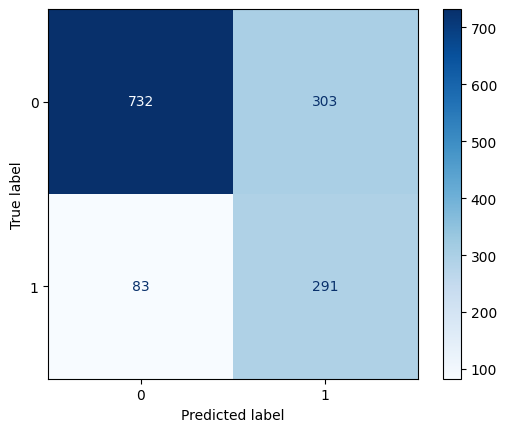

--- SVC ---
              precision    recall  f1-score   support

           0      0.872     0.838     0.855      1035
           1      0.595     0.660     0.626       374

    accuracy                          0.791      1409
   macro avg      0.734     0.749     0.740      1409
weighted avg      0.799     0.791     0.794      1409



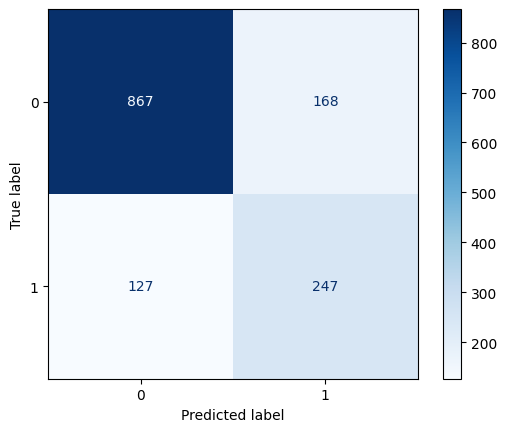

In [ ]:
def evaluate_model(y_true, y_proba, threshold=0.5):
    y_pred = (y_proba >= threshold).astype(int)
    # Define target_names here
    #target_names = ['No Churn', 'Churn']
    print(classification_report(y_true, y_pred, digits=3))#, target_names=target_names))

    cm = confusion_matrix(y_true, y_pred)
    ConfusionMatrixDisplay(cm).plot(cmap='Blues')

    plt.show()

    auc = roc_auc_score(y_true, y_proba)
    #print(f"AUC: {auc:.3f}")

print('--- Naive Bayes ---')
# Evaluate Naive Bayes model with the best threshold found
evaluate_model(y_test, y_proba_nb, threshold=best_thresh_NB)

print('--- SVC ---')
# Evaluate SVC model with the best threshold found
evaluate_model(y_test, y_proba_svc, threshold=best_thresh_SVC)

# 6 . Conclusão

O objetivo desta modelagem foi identificar o modelo que melhor equilibra a precisão e a capacidade de detecção (Recall) de clientes com propensão a churn, utilizando o F1-Score como métrica de otimização, por considerar o custo de perder um cliente (Falso Negativo) superior ao de oferecer um incentivo desnecessário (Falso Positivo).

A análise e comparação entre os modelos Gaussian Naive Bayes (NB) e Support Vector Classifier (SVC) resultaram nas seguintes conclusões:

#### 1. Comparação de Desempenho e Estabilidade

| Modelo              | F1-Score Médio (Validação Cruzada - Treino) | F1-Score Final (Teste com Threshold Ótimo) | Desvio Padrão (CV)         |
|---------------------|---------------------------------------------|--------------------------------------------|-----------------------------|
| Naive Bayes (NB)    | 0.579                                       | 0.601                                      | 0.016                       |
| SVC (Inicial)       | 0.559                                       | 0.512                                      | 0.018                       |
| SVC (Otimizado)     | 0.624                                       | 0.597                                      | 0.017   |


O modelo SVC, após o ajuste de hiperparâmetros via Otimização Bayesiana, demonstrou o melhor desempenho de generalização, atingindo um F1-Score médio de 0.624 na validação cruzada do conjunto de treino.

Modelo Final Recomendado: Ao aplicar o threshold ótimo (0.430) no conjunto de teste, o SVC confirmou sua superioridade, atingindo um F1-Score de 0.626 (com Recall de 0.660), sendo o mais indicado para a tarefa.

Estabilidade: O desvio padrão da Validação Cruzada para ambos os modelos foi baixo (0.016 para NB e 0.018 para o SVC inicial), indicando que o desempenho é consistente entre as diferentes divisões do conjunto de treino.

#### 2. Análise de Threshold e Matriz de Confusão

A otimização do ponto de corte (Threshold) foi crucial para maximizar o F1-Score, conforme a estratégia de negócio:

SVC: O threshold ideal foi identificado em 0.430, resultando em um F1-Score de 0.626 e um Recall de 0.660.

A matriz de confusão do SVC (com threshold 0.430) mostra que o modelo detectou 66.0% dos clientes que de fato fariam churn (Verdadeiros Positivos).

Naive Bayes: Embora tenha apresentado uma taxa de detecção (Recall) ainda maior (0.778), seu F1-Score (0.601) foi inferior ao do SVC, confirmando que o SVC otimizado mantém um melhor equilíbrio entre Precision e Recall.

Recomendação Final  


O Support Vector Classifier (SVC) com hiperparâmetros otimizados (C: 0.52, gamma: 0.011) é o modelo recomendado para a previsão de churn. Sua avaliação robusta (Validação Cruzada) e o desempenho final no conjunto de teste confirmam sua capacidade de oferecer a melhor combinação de precisão e sensibilidade para o problema de negócio apresentado.